# Project: EDA on NICS Firearm Background Checks with FBI



## OBJECTIVE
To Perform Exploratory Data Analysis on the dataset given to you. Major feature engineering techniques and data visualization should be applied to the dataset to draw useful and necessary inferences.



In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import itertools
%matplotlib inline

## DATASET ANALYSIS 
To load the dataset and printout head() i.e first 5 columns to know about what kind of data is there.

- have a glance of data columns
- check the data type in every column
- check NAN value 
- check the duplicates
- and take care of these irregularities 

In [229]:
df = pd.read_csv('./Probation Task 1 (Resources)/dsceda.csv')
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-09,Alabama,26657.0,423.0,18034.0,15390.0,1365.0,912,0.0,16.0,...,0.0,0.0,0.0,27.0,30.0,7.0,0.0,0.0,0.0,65900
1,2021-09,Alaska,174.0,13.0,2497.0,3094.0,310.0,173,0.0,1.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,6520
2,2021-09,Arizona,5962.0,780.0,18406.0,10477.0,1769.0,985,0.0,4.0,...,0.0,0.0,0.0,10.0,9.0,3.0,0.0,2.0,0.0,40033
3,2021-09,Arkansas,3259.0,719.0,6946.0,6783.0,495.0,388,1.0,6.0,...,0.0,0.0,0.0,8.0,3.0,0.0,0.0,1.0,0.0,20536
4,2021-09,California,17520.0,14442.0,37842.0,27880.0,6190.0,0,0.0,0.0,...,101.0,0.0,0.0,6793.0,2963.0,541.0,23.0,18.0,0.0,116704


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15125 entries, 0 to 15124
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      15125 non-null  object 
 1   state                      15125 non-null  object 
 2   permit                     15101 non-null  float64
 3   permit_recheck             3740 non-null   float64
 4   handgun                    15105 non-null  float64
 5   long_gun                   15106 non-null  float64
 6   other                      8140 non-null   float64
 7   multiple                   15125 non-null  int64  
 8   admin                      15102 non-null  float64
 9   prepawn_handgun            13182 non-null  float64
 10  prepawn_long_gun           13180 non-null  float64
 11  prepawn_other              7755 non-null   float64
 12  redemption_handgun         13185 non-null  float64
 13  redemption_long_gun        13184 non-null  flo

In [231]:
df.isnull().sum() #check NAN value

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [232]:

df.duplicated() #checking for duplicated values

0        False
1        False
2        False
3        False
4        False
         ...  
15120    False
15121    False
15122    False
15123    False
15124    False
Length: 15125, dtype: bool

### Data Cleaning

- To fill the null (NAN) values with 0
- The dtype of counts of guns is float to convert it into integer.
- Splitting the month such that to get YEAR(would be useful lateron when needed to compare it with population cencus).

In [233]:
df.fillna(0, inplace=True)

In [234]:
columns_float = df.columns[2:-1]
for c in columns_float:
    df[c] = df[c].apply(lambda x:int(x))

In [235]:
df['year_month'] = df['month']
df['year'] = df['month'].apply(lambda x: int(x.split("-")[0]))
df['month'] = df['month'].apply(lambda x: int(x.split("-")[1]))

In [236]:
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year_month,year
0,9,Alabama,26657,423,18034,15390,1365,912,0,16,...,0,27,30,7,0,0,0,65900,2021-09,2021
1,9,Alaska,174,13,2497,3094,310,173,0,1,...,0,5,3,0,0,0,0,6520,2021-09,2021
2,9,Arizona,5962,780,18406,10477,1769,985,0,4,...,0,10,9,3,0,2,0,40033,2021-09,2021
3,9,Arkansas,3259,719,6946,6783,495,388,1,6,...,0,8,3,0,0,1,0,20536,2021-09,2021
4,9,California,17520,14442,37842,27880,6190,0,0,0,...,0,6793,2963,541,23,18,0,116704,2021-09,2021


<a id='eda'></a>
## Exploratory Data Analysis

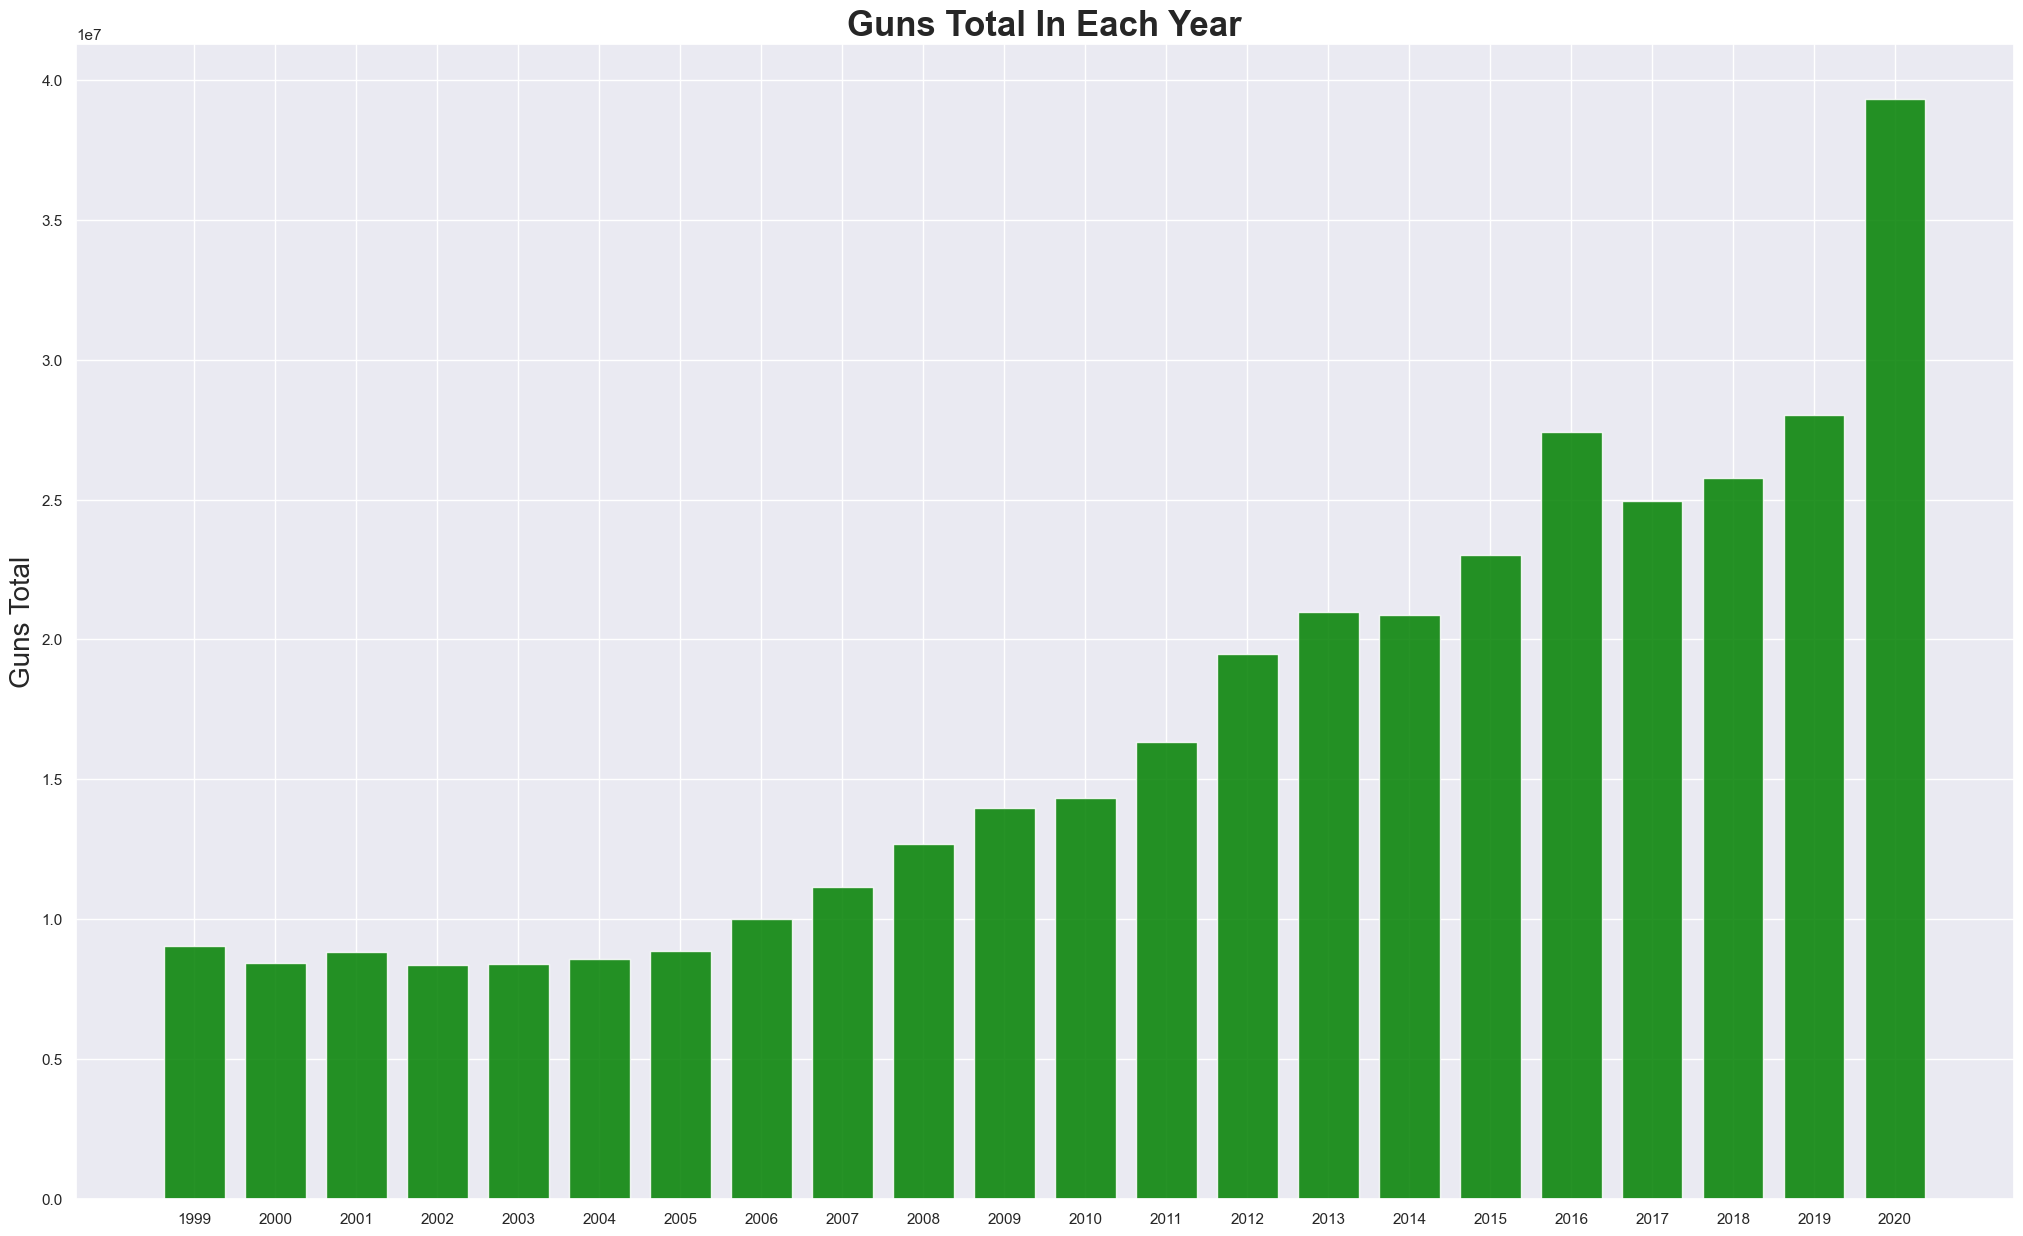

In [251]:
# not considering 2021 and 1998 coz not the full years so the results would be inflated.
df_year_totals = df.query("year < 2021 and year > 1998").groupby(['year']).sum()
labels = np.arange(1999,2021)
sns.set()
width = 0.75      
plt.figure(figsize=(25,15))
plt.bar(labels, df_year_totals['totals'], width, alpha=0.85,color='green')
plt.ylabel('Guns Total',fontsize=20)
plt.title('Guns Total In Each Year',fontsize=25,fontweight='bold')
plt.xticks(labels)
plt.show()

### Infrences
- The following graph depicts the upwards trend in increasing number of total guns every year 
- There's a significant surge in gun purchases around the "ELECTION TIMES" as seen in 2016 and 2020 increased gun purchases

/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


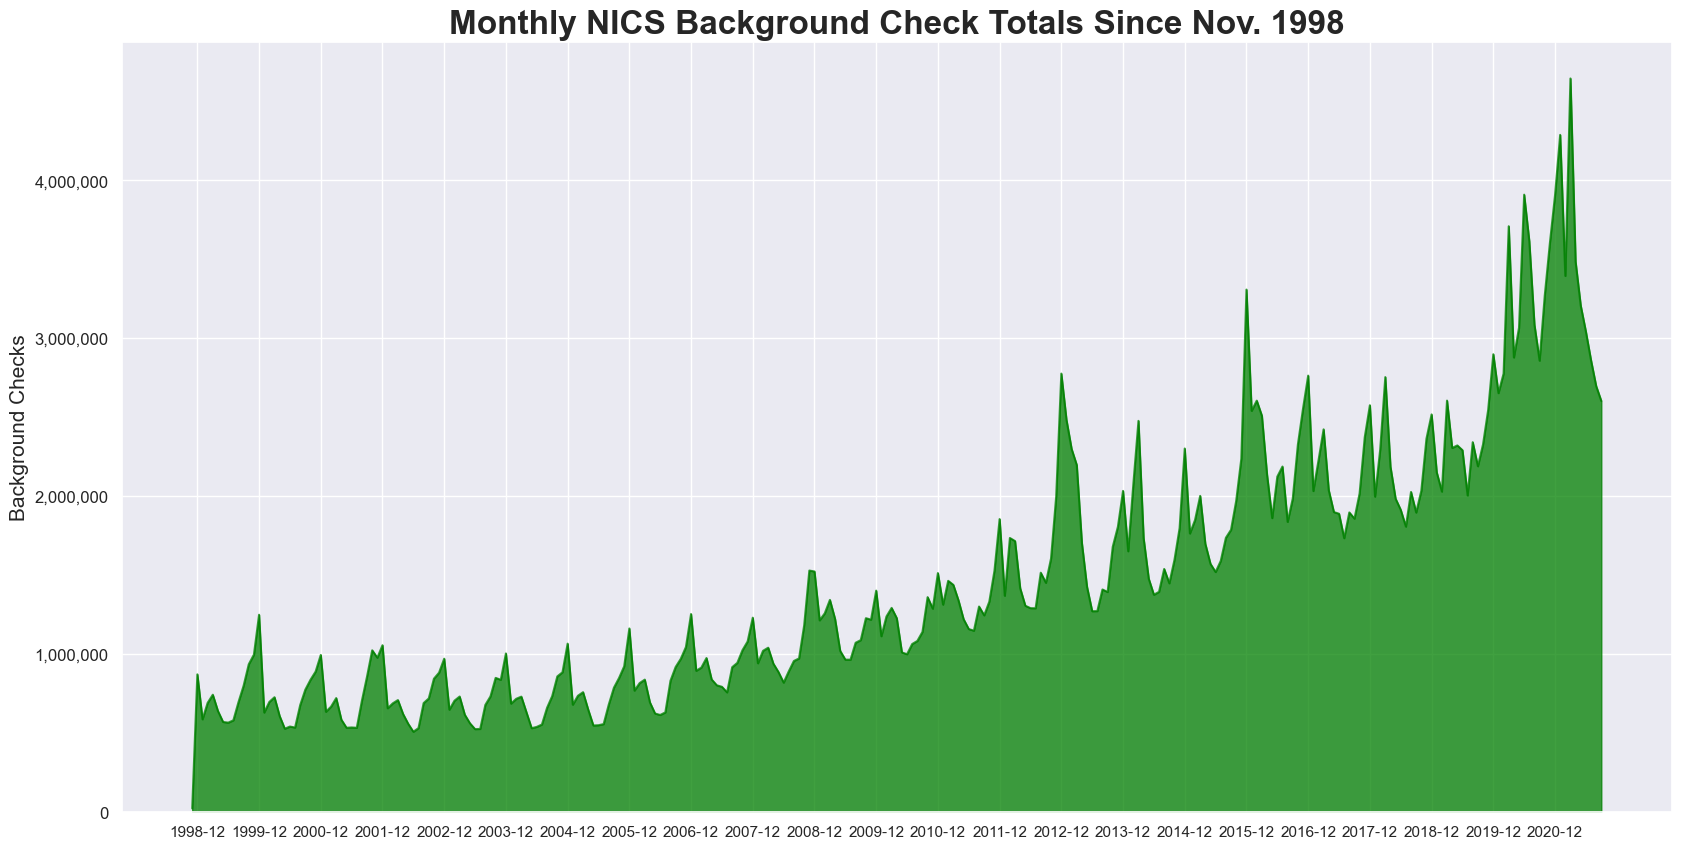

In [259]:
df_month_totals = df.groupby(['year_month'], as_index=False).sum()
df_month_totals
ax = df_month_totals['totals'].plot.area(figsize=(20,10), alpha=0.75,color='green')
tick_placement = pd.np.arange(1, len(df_month_totals), 12)
ax.set_title("Monthly NICS Background Check Totals Since Nov. 1998", fontsize=24, fontweight='bold')
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12)
plt.ylabel('Background Checks', fontsize=15)
ax.set_xticks(tick_placement)
ax.set_xticklabels([ df_month_totals.loc[i,'year_month'] for i in tick_placement ]);


### Infrences
- The total amount of transactions checked through the system has been increasing year by year. According to the monthly area charts, the annual peak is actually December.
 

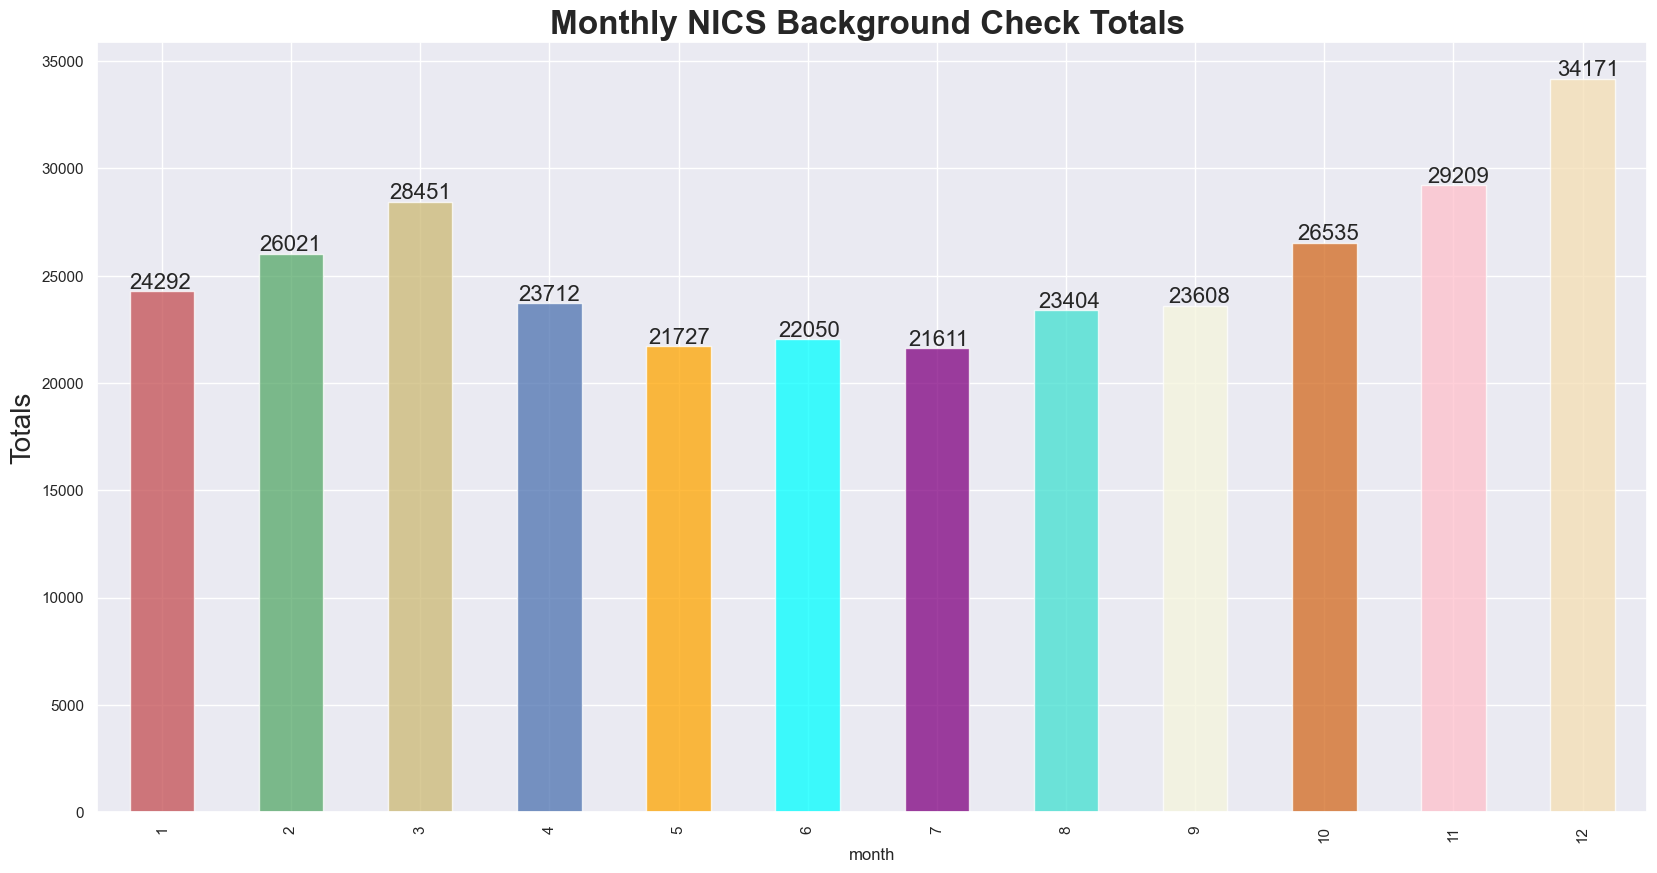

In [239]:
df_month_mean = df.query("year < 2021 and year > 1998").groupby(['month']).mean()
labels = np.arange(1999,2021)
ax = df_month_mean['totals'].plot.bar(figsize=(20,10), alpha=0.75,color=['r','g','y','b','orange','cyan','purple','turquoise','beige','chocolate','pink','wheat'])
ax.set_title("Monthly NICS Background Check Totals ", fontsize=24, fontweight='bold');
plt.ylabel("Totals", fontsize=20)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)

### Infrences
- Through the observation of the monthly data, it was found that the number of guns traded in May, June and July was on decline, but the number of guns trades steadily increased relatively from October to March. 
- As depicted the total Guns sold during the last month of DECEMBER peaks by a steady margin could be due to hunting season peak.

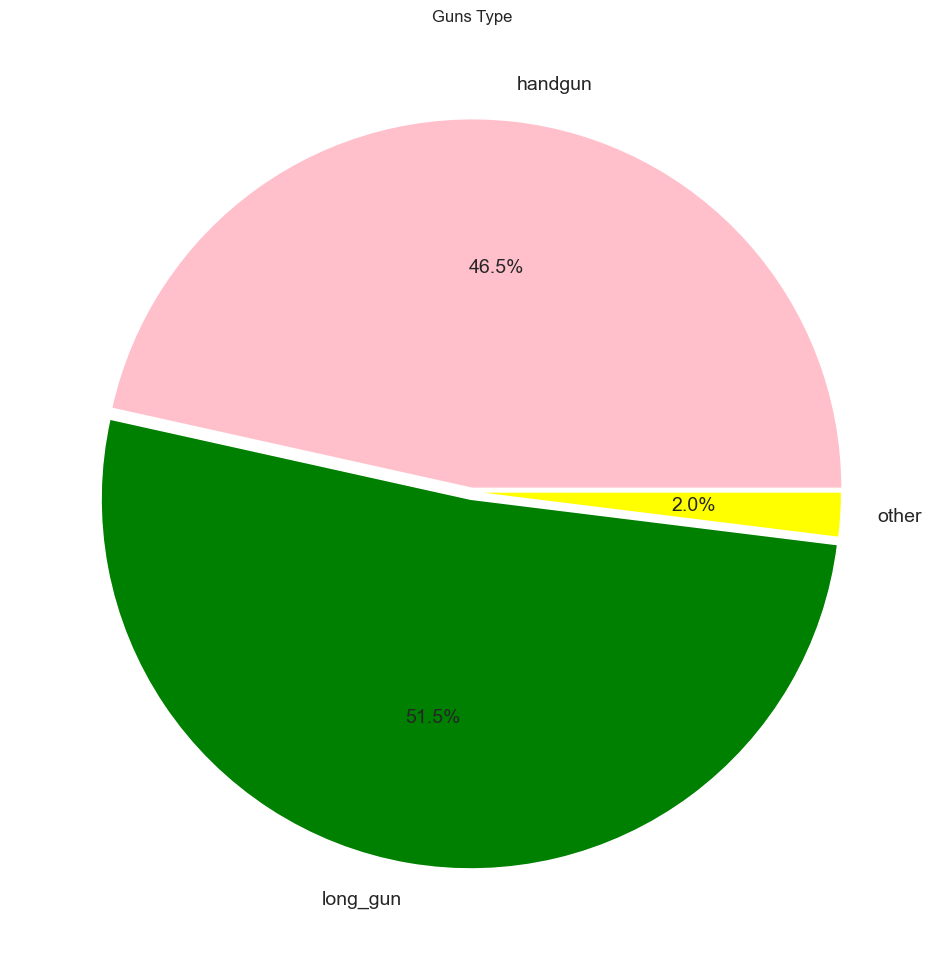

Signature:
plt.pie(
    x,
    explode=None,
    labels=None,
    colors=None,
    autopct=None,
    pctdistance=0.6,
    shadow=False,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    *,
    normalize=True,
    data=None,
)
Docstring:
Plot a pie chart.

Make a pie chart of array *x*.  The fractional area of each wedge is
given by ``x/sum(x)``.

The wedges are plotted counterclockwise, by default starting from the
x-axis.

Parameters
----------
x : 1D array-like
    The wedge sizes.

explode : array-like, default: None
    If not *None*, is a ``len(x)`` array which specifies the fraction
    of the radius with which to offset each wedge.

labels : list, default: None
    A sequence of strings providing the labels for each wedge

colors : array-like, default: None
    A sequence of colors through which the pie chart will cycle.  If
    *None*, will use th

In [256]:
df_guns_type = df.loc[:,'handgun':'other'].sum()
df_guns_type.plot.pie(autopct='%1.1f%%', title="Guns Type", label="",
                  fontsize=14, figsize=(12,12), explode=[0.01,0.02,0.0],colors=['pink','green','yellow'])
plt.pie?

### Infrences
- Through this Pie Chart, it was found that the long guns were more popular than the shorts.
- But the survey is a bit crude and we need to compare it at different times of months and at different years through teh whole history of data.

/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


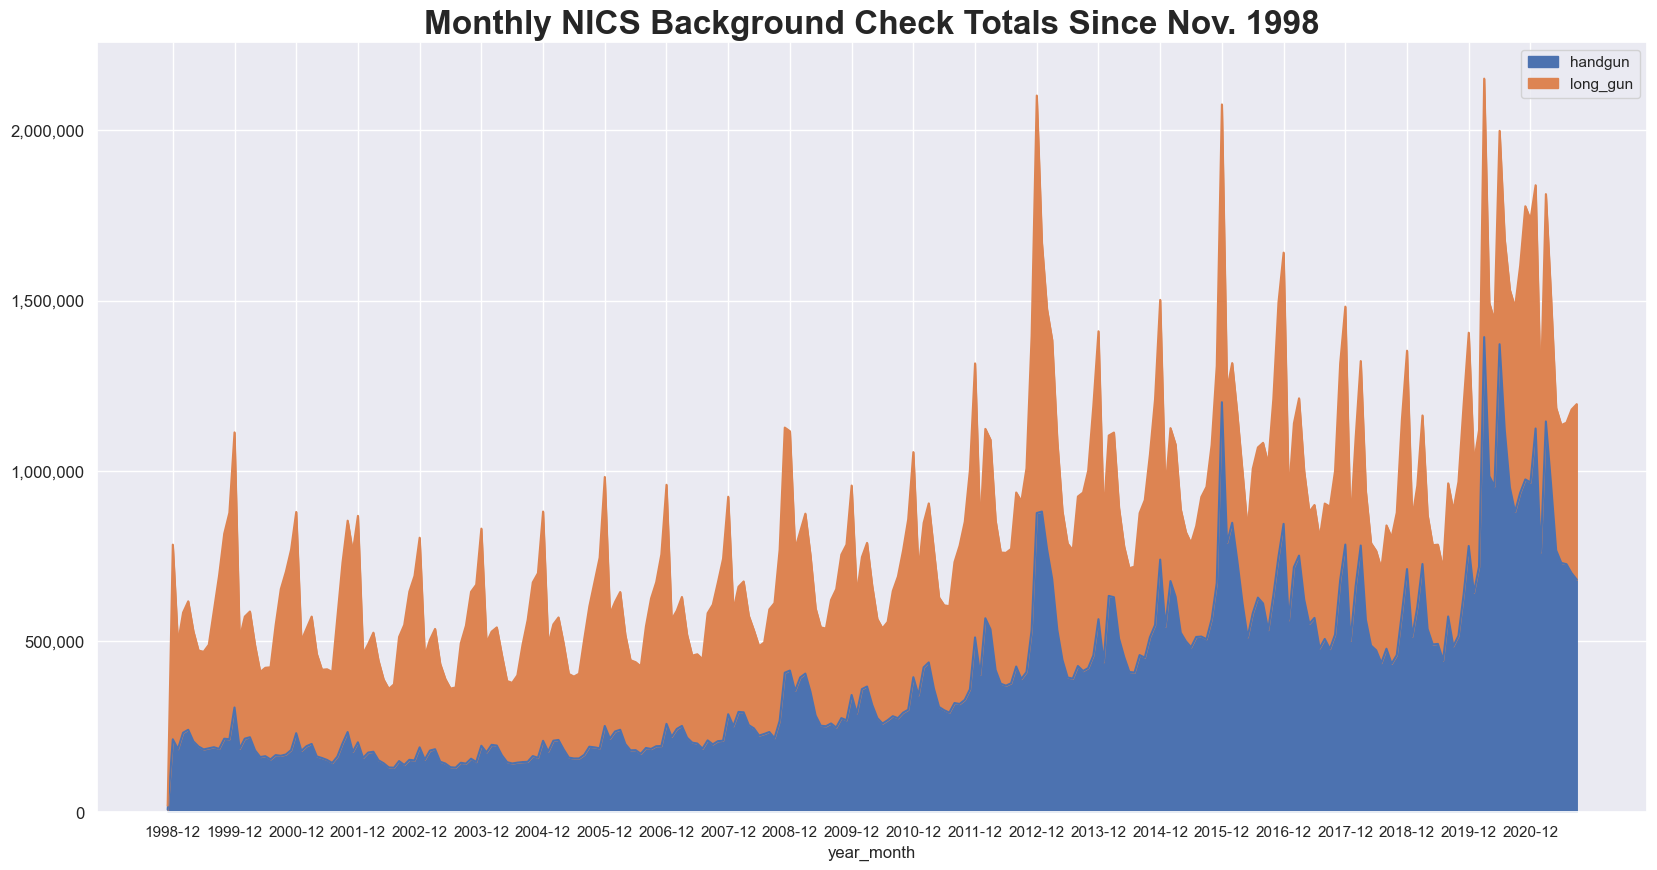

In [241]:
df_guns_type = df.groupby(['year_month']).sum().loc[:,'handgun':'long_gun']
ax = df_guns_type.plot.area(figsize=(20,10));
tick_placement = pd.np.arange(1, len(df_guns_type), 12)
ax.set_title("Monthly NICS Background Check Totals Since Nov. 1998", fontsize=24,fontweight='bold')
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12)
ax.set_xticks(tick_placement)
ax.set_xticklabels([ df_month_totals.loc[i,'year_month'] for i in tick_placement ]);

### Infrences
- We found that the trend of guns and pistols are basically the same, but by the year 2015.
- But the area of guns in the plot seems to outnumber the rifles and is increasing much faster than the long guns.

/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


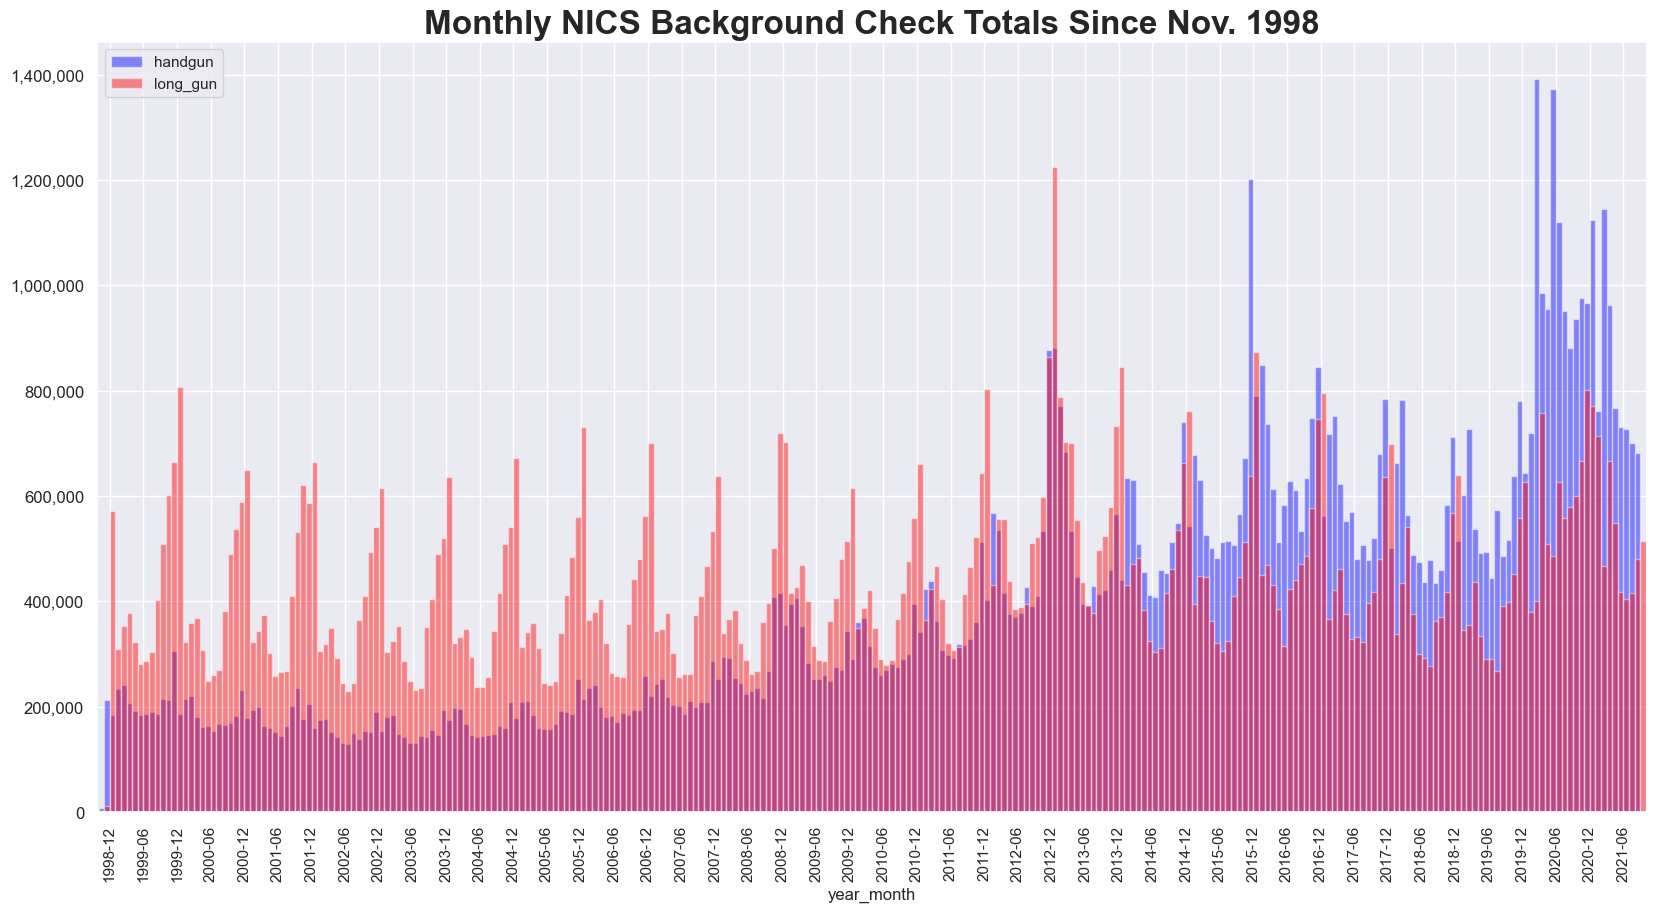

In [250]:
df_guns_type = df.groupby(['year_month']).sum().loc[:,'handgun':'long_gun']
ax = df_guns_type.plot.bar(figsize=(20,10), alpha=0.45, width=2, color=['blue', 'red']);
tick_placement = pd.np.arange(1, len(df_guns_type), 6)
ax.set_title("Monthly NICS Background Check Totals Since Nov. 1998", fontsize=24, fontweight='bold')
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12)
ax.set_xticks(tick_placement)
ax.set_xticklabels([ df_month_totals.loc[i,'year_month'] for i in tick_placement ]);

### Infrences
- It is clear that since 2014, the number of pistol transactions has overtaken the rifle and continues until now.
- This may be a result of government policy and people preferences transferring from the old days of long guns shotguns rifles to much shorter handguns and pistols.

### Long gun and handgun in different times

- To study this issue requires a bit of additional information, that is, from 1998 to the present time of several presidents.
- Based on these times, grouping(Bining) was conducted to compare the U.S. gun trade data for different presidential periods. 
- In order to be fair, we still discard the channels of leasing and pawnshops which appeared only in the latter part of the period, and only keep the mainstream trading channels.
- This could also be good oppurtunity to compare the Presindential reignf of various Presidents of different parties
- It could show the type of reign REPUBLICAN vs DEMOCRATIC 

## Presidential Terms：
- Bill Clinton ： 1993 - 2001
- George Walker Bush： 2001 - 2009
- Barack Hussein Obama II： 2009 - 2017
- Donald John Trump：2017 - 2020
- Joseph Robinette Biden, Jr.: 2021 - 

In [243]:
# create bins by Presidential ruling schedule
bin_edges = [ 1998, 2001, 2009, 2017, 2020 , 2021] 
bin_names = ['Clinton', 'Bush', 'Obama', 'Trump','Biden']
df['president'] = pd.cut(df['year'], bins=bin_edges, labels=bin_names) 

/Users/priyanshumishra/opt/anaconda3/envs/Tensorfloww/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


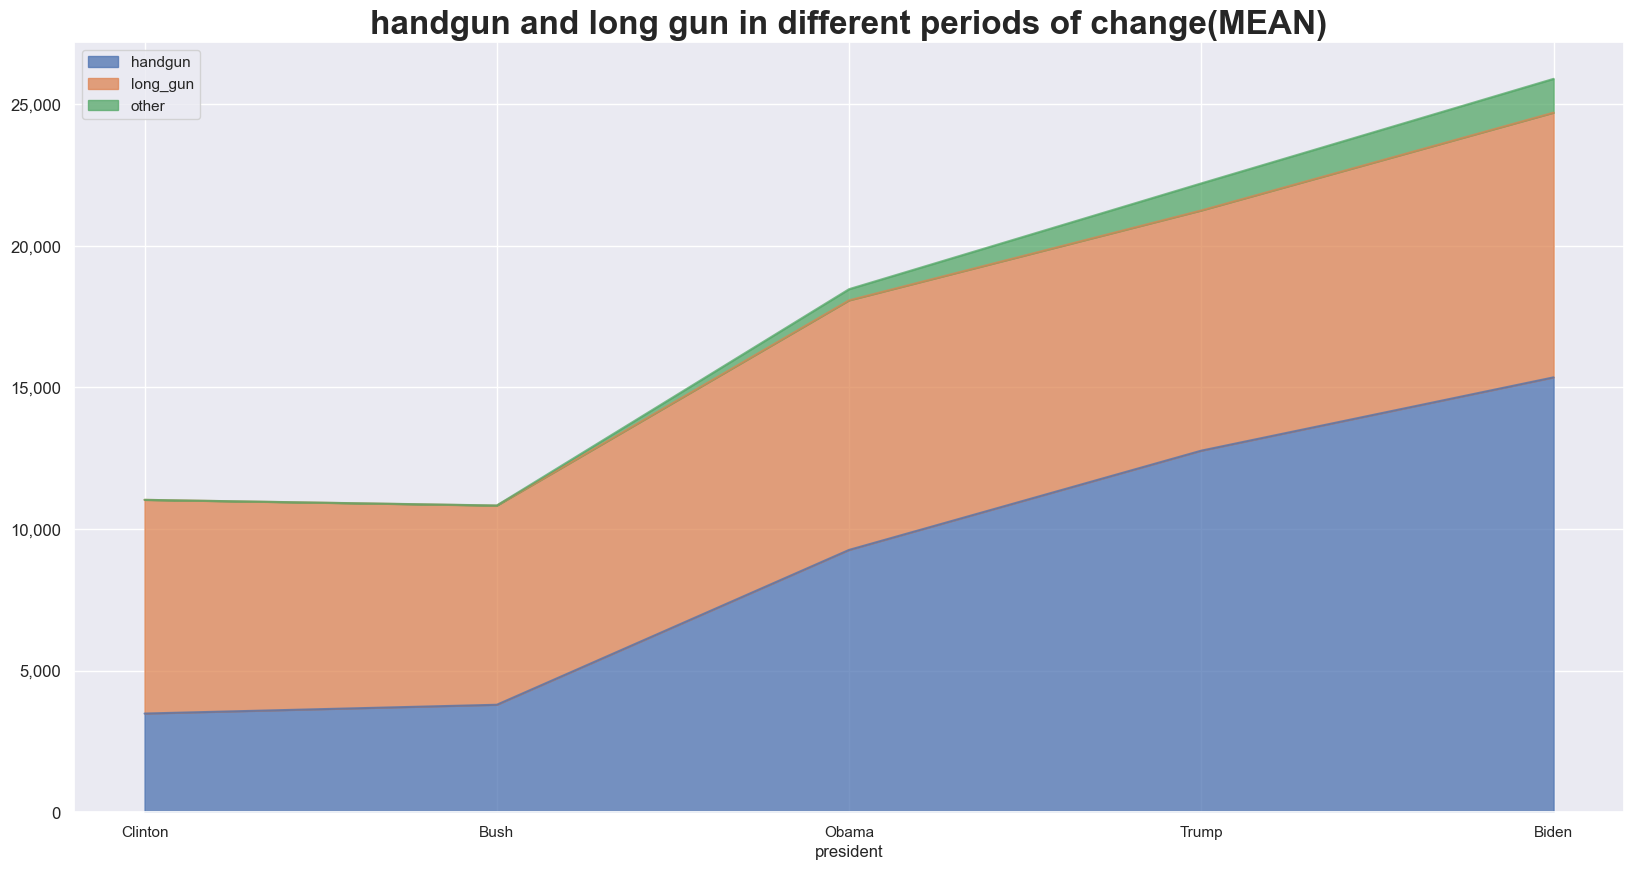

In [247]:
df_pre = df.groupby('president').mean()
datas = df_pre.loc[:,'handgun':'other']
ax = datas.plot.area(figsize=(20,10), alpha=0.75);
tick_placement = np.arange(0, len(datas), 1)
ax.set_title("handgun and long gun in different periods of change(MEAN)", fontsize=24,fontweight='bold')
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12)
ax.set_xticks(tick_placement)
ax.set_xticklabels(bin_names);

In [245]:
datas.plot.density?

Signature: datas.plot.density(bw_method=None, ind=None, **kwargs)
Docstring:
Generate Kernel Density Estimate plot using Gaussian kernels.

In statistics, `kernel density estimation`_ (KDE) is a non-parametric
way to estimate the probability density function (PDF) of a random
variable. This function uses Gaussian kernels and includes automatic
bandwidth determination.

.. _kernel density estimation:
    https://en.wikipedia.org/wiki/Kernel_density_estimation

Parameters
----------
bw_method : str, scalar or callable, optional
    The method used to calculate the estimator bandwidth. This can be
    'scott', 'silverman', a scalar constant or a callable.
    If None (default), 'scott' is used.
    See :class:`scipy.stats.gaussian_kde` for more information.
ind : NumPy array or int, optional
    Evaluation points for the estimated PDF. If None (default),
    1000 equally spaced points are used. If `ind` is a NumPy array, the
    KDE is evaluated at the points passed. If `ind` is an intege

### Infrences
- The explosive growth of firearms from President Bush's term continues into Trump era
- The main reason for the itial arming during Bush era could be attributed to "9/11 ATTACKS" early in his terms. 
- It can be found that the regular volume of transactions that were imposed during the Obama administration has seen an even more explosive growth.
- This trend continues and doesn't slow down in Trump era, thus proving that it doesn't matter which party is in power the guns have sold nonetheless.



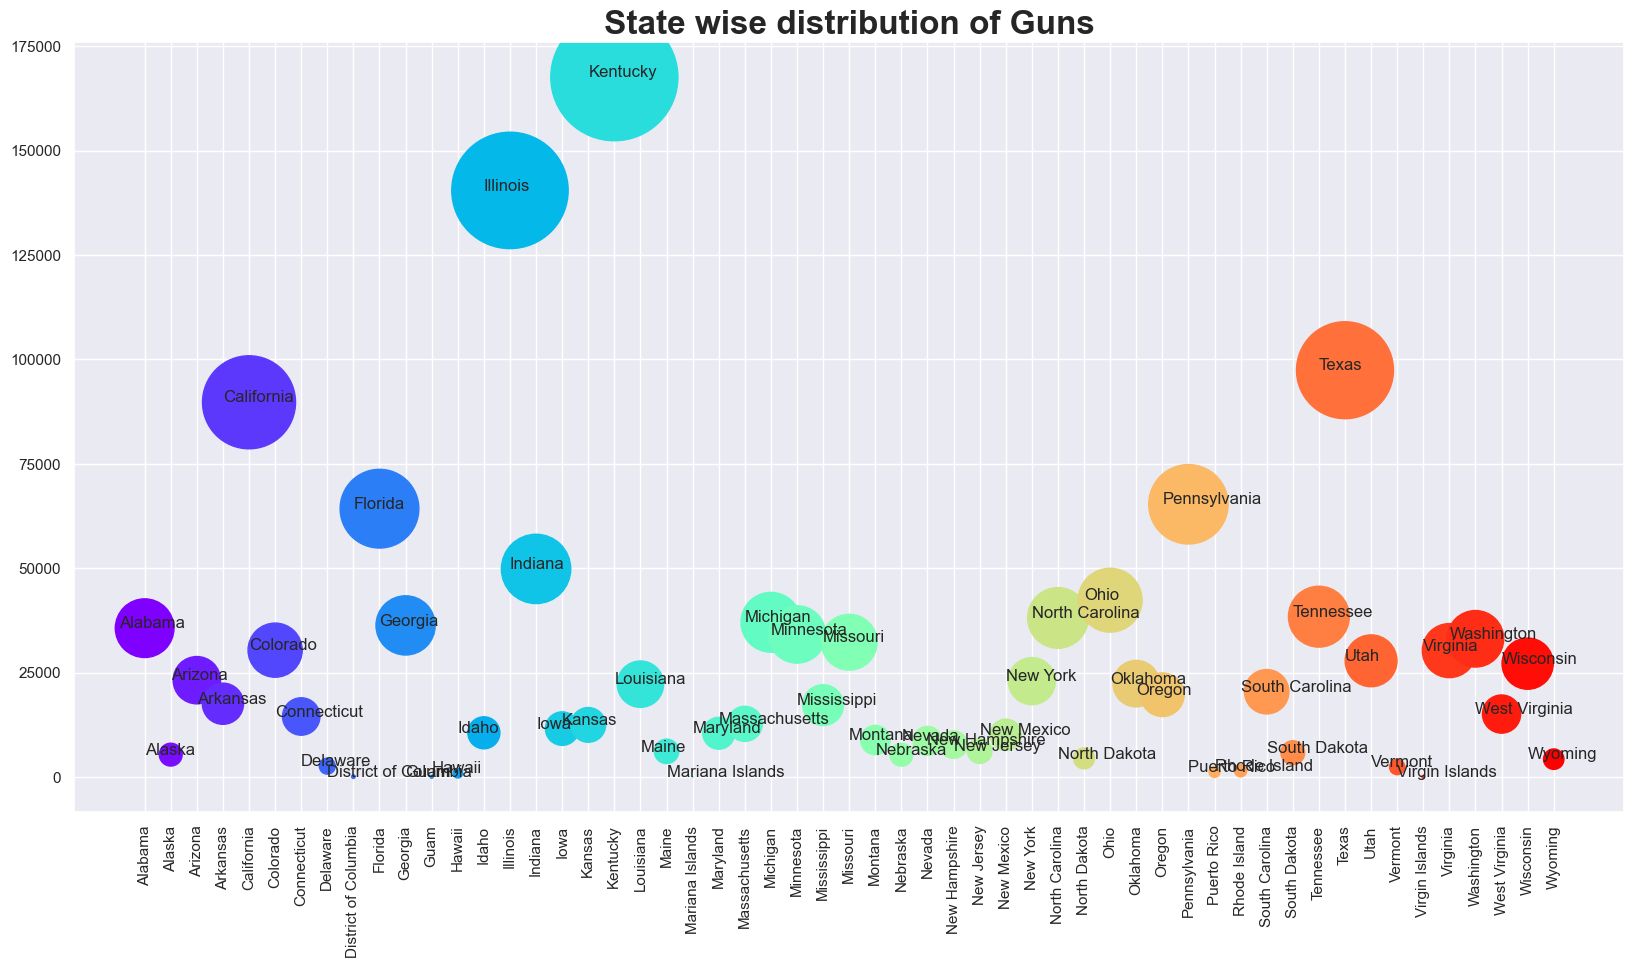

In [279]:
df_region = df.groupby(['state'], as_index=False).mean()

x = np.arange(len(df_region))
y = df_region['totals']
s = df_region['totals'] / 20
c = cm.rainbow(np.linspace(0, 1, len(y)))
plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.set_title("State wise distribution of Guns", fontsize=24, fontweight='bold')
plt.xticks(x, df_region['state'], rotation='vertical')
ax.scatter(x=x, y=y, s=s, color=c)
for i, txt in enumerate(df_region['state']):
    ax.annotate(txt, (x[i]-1, y[i]),fontsize=12)

### Infrences
- The statewise distribution of guns show an intresting trend of Kentucky having most guns
- A smaller and less populous state such as Illinois and Kentucky have more guns(registered) than bigger states such asTexas and California
- But still these bigger states such as Texas California Florida are very high in Guns


##### Politics involved:
- The red states(Republican States) such as Texas Florida Kentucky Pennsylvania Alabama
- Showing that 2nd Ammendment upholders are more inclined in buying guns
- Also more rural mid western states have disparity in  amount of guns brought through authentic and traditional channels.

## Population vs Guns
- This is important to check whether th Kentucky havin such a robust gun trade is anmyway linked to its population
- Thus USA Census 2019 statewise population dataset from KAGGLE is used in conjuction with the given dataset

In [211]:
df=pd.read_csv('./2019_Census_US_Population_Data_By_State_Lat_Long.csv')

In [212]:
df=df.drop(['lat','long'], axis=1)

In [213]:
df.columns= df.columns.str.lower()

In [214]:
df1=pd.read_csv('./Probation Task 1 (Resources)/dsceda.csv')
df1['year_month'] = df1['month']
df1['year'] = df1['month'].apply(lambda x: int(x.split("-")[0]))
df1['month'] = df1['month'].apply(lambda x: int(x.split("-")[1]))

In [215]:
df1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year_month,year
0,9,Alabama,26657.0,423.0,18034.0,15390.0,1365.0,912,0.0,16.0,...,0.0,27.0,30.0,7.0,0.0,0.0,0.0,65900,2021-09,2021
1,9,Alaska,174.0,13.0,2497.0,3094.0,310.0,173,0.0,1.0,...,0.0,5.0,3.0,0.0,0.0,0.0,0.0,6520,2021-09,2021
2,9,Arizona,5962.0,780.0,18406.0,10477.0,1769.0,985,0.0,4.0,...,0.0,10.0,9.0,3.0,0.0,2.0,0.0,40033,2021-09,2021
3,9,Arkansas,3259.0,719.0,6946.0,6783.0,495.0,388,1.0,6.0,...,0.0,8.0,3.0,0.0,0.0,1.0,0.0,20536,2021-09,2021
4,9,California,17520.0,14442.0,37842.0,27880.0,6190.0,0,0.0,0.0,...,0.0,6793.0,2963.0,541.0,23.0,18.0,0.0,116704,2021-09,2021


In [216]:
df3 = df1.groupby(['year','state'], as_index=False).sum().query("year==2019")


In [217]:
df3.head()

,year,state,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1155,2019,Alabama,78,348147.0,6973.0,160667.0,120258.0,8515.0,7868,0.0,...,0.0,0.0,0.0,298.0,213.0,43.0,6.0,11.0,2.0,690084
1156,2019,Alaska,78,2579.0,118.0,31943.0,31090.0,3784.0,2476,0.0,...,0.0,0.0,0.0,193.0,168.0,11.0,4.0,0.0,1.0,76923
1157,2019,Arizona,78,68547.0,6544.0,158864.0,89182.0,15720.0,10361,0.0,...,13.0,0.0,0.0,209.0,112.0,35.0,4.0,4.0,1.0,372912
1158,2019,Arkansas,78,35865.0,9224.0,68549.0,68773.0,4399.0,4947,161.0,...,0.0,0.0,0.0,102.0,151.0,19.0,1.0,9.0,0.0,221344
1159,2019,California,78,431844.0,0.0,432239.0,299161.0,49517.0,0,17326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1240632


In [218]:
df2=pd.merge(df3,df)
df2.head()

,year,state,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,popestimate2019
0,2019,Alabama,78,348147.0,6973.0,160667.0,120258.0,8515.0,7868,0.0,...,0.0,0.0,298.0,213.0,43.0,6.0,11.0,2.0,690084,4903185
1,2019,Alaska,78,2579.0,118.0,31943.0,31090.0,3784.0,2476,0.0,...,0.0,0.0,193.0,168.0,11.0,4.0,0.0,1.0,76923,731545
2,2019,Arizona,78,68547.0,6544.0,158864.0,89182.0,15720.0,10361,0.0,...,0.0,0.0,209.0,112.0,35.0,4.0,4.0,1.0,372912,7278717
3,2019,Arkansas,78,35865.0,9224.0,68549.0,68773.0,4399.0,4947,161.0,...,0.0,0.0,102.0,151.0,19.0,1.0,9.0,0.0,221344,3017804
4,2019,California,78,431844.0,0.0,432239.0,299161.0,49517.0,0,17326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1240632,39512223


In [219]:
df2.to_csv('./fbiandpop.csv', index=False) #saving this dataset for further use.

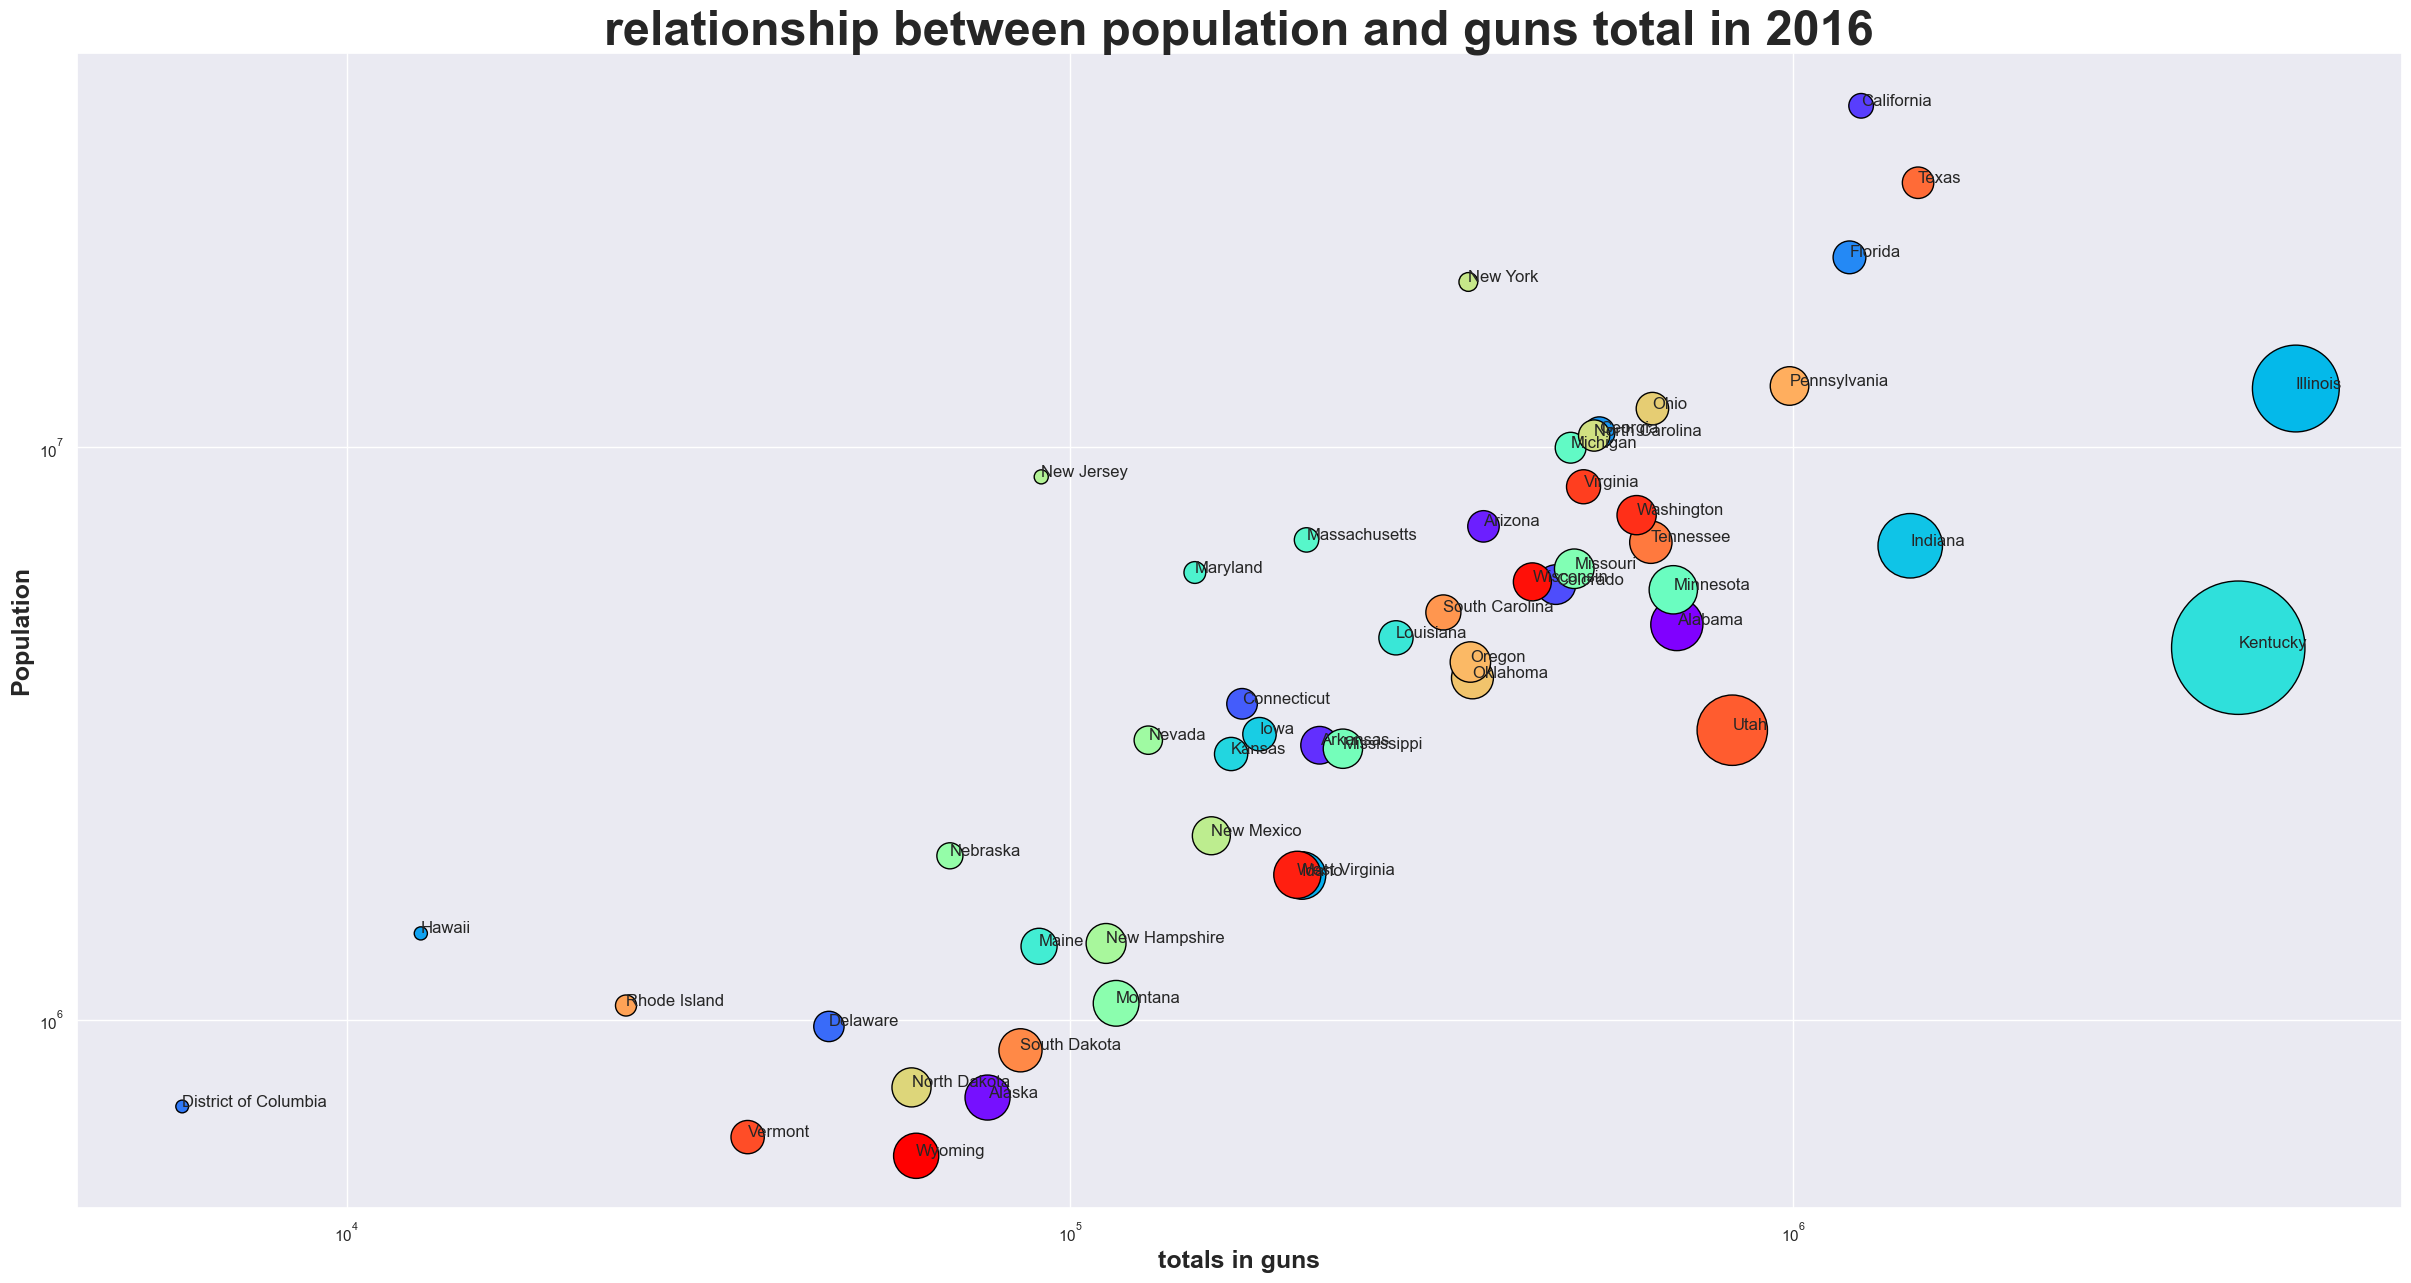

In [284]:
y = df2['popestimate2019']
x = df2['totals']
s =  df2['totals'] / df2['popestimate2019']  * 10000
c = cm.rainbow(np.linspace(0, 1, len(y)))
plt.figure(figsize=(30,15))
ax = plt.subplot()

ax.scatter(x=x, y=y, s=s, color=c,edgecolor='black')
plt.xscale('log')
plt.yscale('log')
for i, txt in enumerate(df2['state']):
    ax.annotate(txt, (x[i]-1, y[i]))
plt.xlabel('totals in guns', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18, fontweight='bold')
plt.title('relationship between population and guns total in 2016', fontsize=35,fontweight='bold');
# ax.scatter?

### Inference
- We can find that there is a positive correlation between total population and total firearms.
- Proves the suspicion that despite their lower Population density Kentucky and Illinois more so are an outier
- Also the bigger more populous states have much more guns .


## Conclusions

- In general, the number of guns in the United States has been rising year by year. 
- In the Obama and Trump era, the number of firearms began to increase rapidly at alarming rates and this probably corelates with more "CRIME".
- And the amount of short handguns gradually are taking over the long guns.
- Finally, the number of guns is also related to the size of the state. The more people in the state, the more guns there are, but this is not always the case as evident in the case of Illinois and Kentucky.
- Perhaps, people are increasingly insecure, so most people buy guns and people are also more polarised and Politics especially Republican vs Democrat has a big influence on that.
- People tend to use short handguns for self-defense rather than long guns, perhaps to avoid accidents.
- Long guns are more used in hunting .
- This increased guns would lead more and more voilence and can be corelated to deaths mass-shootings suicides accidents etc in the USA.